# Coursera Capstone Project - Traffic Accident Severity Prediction
## Predicting the traffic accident severity using Machine Learning Algorithms
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
1. [Introduction: Business Problem](#introduction)
2. [Data](#data)<br>
    1. [Installing the required libraries](#libraries)<br>
    2. [Dropping non-valuable columns](#dropcolumns)<br>
    3. [Replacing NaN values and drop of non-valuable rows](#dropcolrows)<br>    
       1. [Dropping the row with NaN values related to SEVERITYCODE](#dropsev)<br>        
       * [INATTENTIONIND Column analysis and NaN replacement](#repinat)<br>
       * [UNDERINFL Column analysis and NaN replacement](#repund)<br>
       * [SPEEDING Column analysis and NaN replacement](#repspeed)<br>
       * [PEDROWNOTGRNT Column analysis and NaN replacement](#reppedro)<br>
       * [Dropping rows with NaN values in WEATHER, ROADCOND and LIGHTCOND](#repwea)<br>
       * [SEVERITYCODE Column analysis and value replacement](#sevrep)<br>     
- [Methodology](#methodology)<br>
    1. [Accidents Map](#accidentmap)<br>
    2. [Plots](#plots)<br>
       1. [Under drug influence vs Accident severity](#drugvsacc)<br>
       * [Inattention vs Accident Severity](#inaacc)<br>
       * [Speeding vs Accident Severity](#speeacc)<br>
       * [Road conditions vs Accident severity](#roadvsacc)<br>
       * [Light conditions vs Accident severity](#lightvsacc)<br>
       * [Weather conditions vs Accident severity](#weathervsacc)<br>
       * [Weather conditions vs Light conditions using Accident severity as colour parameter](#roadvslight)<br>
       * [Road conditions vs Weather conditions using Accident severity as colour parameter](#roadvsweather)<br>
       * [Numerical comparison results among Weather conditions, Light conditions and Road conditions, with the count of each Accident severity](#variabres)<br>
    3. [Accident severity prediction using all the valuable features](#severitypred)<br>
       1. [Transforming categorical columns into numerical columns](#getdummies)<br>
       * [Choice of the best machine learning algorithm](#choicealgo)<br>
       * [Random Forest Algorithm](#randomforest)<br>
       * [Random Forest Features Importance](#randfeat)<br>
       * [Decision Trees Algorithm](#decision)<br>
       * [Decision Tree Features Importance](#decfeat)<br>
    4. [Accident severity prediction using only the weather conditions, light conditions and road conditions](#predwlr)<br>
       1. [Random Forest Algorithm 2](#ranwlr)<br>
       * [Random Forest feature importance 2](#rfwlr)<br>
       * [Decision Tree Algorithm 2](#decwlr)<br>
       * [Decision Tree feature importance 2](#dcfwlr)<br>
- [Results and Discussion](#results)
- [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In the world more than 3700 people lose their lives, everyday, in road accidents, and other millions of people report injuries or permanent disabilities. 

In this project I will try to determine which algorithm is the most suitable for the present case study and their respective accuracy calculating the accidents severity given some variables (features).

## Data <a name="data"></a>

To obtain the best model accuracy we need to clean and balance the dataset first. 

Other Variables such as the position of the accident ( Coordinates ), junction type, use of drugs/alcohol, speeding and/or inattention can be use to determine whether the presence of a certain correlation in road accidents and their severity, as well as weather conditions, road conditions and light conditions.

The dataset and other sources that will be used to address this problem are:
* The Seattle Collisions Dataset, available <a href="https://data-seattlecitygis.opendata.arcgis.com/datasets/collisions">here</a>
* The Dataset Metadata, available <a href="https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf">here</a>
* PNG Image of Seattle city, that I especially made for this project, available <a href="https://raw.githubusercontent.com/Okenite1/Coursera_Capstone/main/Seattle_city_final.png">here</a>

### Installing the required libraries <a name="libraries"></a>

In [1]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge datashader --yes
%config IPCompleter.greedy=True
import time
import numpy as np
import pandas as pd
import json
import folium
import urllib.request
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from geopy.geocoders import Nominatim
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


Now that the required libraries have been installed, we will proceed importing our dataset.

In [2]:
df = pd.read_csv('C:\\Users\\Francesco\\Desktop\\Studio dati progetto data-science\\Collisions.csv')
df.head(5)

X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO   STATUS  \
0 -122.356511  47.517361         1  327920     329420  3856094  Matched   
1 -122.361405  47.702064         2   46200      46200  1791736  Matched   
2 -122.317414  47.664028         3    1212       1212  3507861  Matched   
3 -122.318234  47.619927         4  327909     329409  EA03026  Matched   
4 -122.351724  47.560306         5  104900     104900  2671936  Matched   

       ADDRTYPE   INTKEY                                           LOCATION  \
0  Intersection  34911.0                      17TH AVE SW AND SW ROXBURY ST   
1         Block      NaN     HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW   
2         Block      NaN  ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...   
3  Intersection  29054.0                           11TH AVE E AND E JOHN ST   
4         Block      NaN  WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...   

  EXCEPTRSNCODE EXCEPTRSNDESC SEVERITYCODE                    SEVERITYDESC  \
0                         NaN            1  Property Damage Only Collision   
1           NaN           NaN            1  Property Damage Only Collision   
2                         NaN            2                Injury Collision   
3                         NaN            2                Injury Collision   
4           NaN           NaN            2                Injury Collision   

  COLLISIONTYPE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0        Angles            2         0            0         2         0   
1    Rear Ended            2         0            0         2         0   
2       Head On            2         0            0         2         1   
3    Pedestrian            3         1            0         1         1   
4         Other            2         0            0         1         1   

   SERIOUSINJURIES  FATALITIES                 INCDATE                INCDTTM  \
0                0           0  2020/01/19 00:00:00+00   1/19/2020 9:01:00 AM   
1                0           0  2005/04/11 00:00:00+00   4/11/2005 6:31:00 PM   
2                0           0  2013/03/31 00:00:00+00   3/31/2013 2:09:00 AM   
3                0           0  2020/01/06 00:00:00+00    1/6/2020 5:55:00 PM   
4                0           0  2009/12/25 00:00:00+00  12/25/2009 7:00:00 PM   

                              JUNCTIONTYPE  SDOT_COLCODE  \
0   At Intersection (intersection related)          11.0   
1  Mid-Block (not related to intersection)          14.0   
2  Mid-Block (not related to intersection)          11.0   
3   At Intersection (intersection related)          24.0   
4  Mid-Block (not related to intersection)          28.0   

                                        SDOT_COLDESC INATTENTIONIND UNDERINFL  \
0  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...            NaN         N   
1       MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END              Y         0   
2  MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...            NaN         N   
3                    MOTOR VEHCILE STRUCK PEDESTRIAN            NaN         N   
4      MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT            NaN         0   

   WEATHER ROADCOND                LIGHTCOND PEDROWNOTGRNT  SDOTCOLNUM  \
0    Clear      Dry                 Daylight           NaN         NaN   
1  Raining      Wet                     Dusk           NaN   5101020.0   
2    Clear      Dry  Dark - Street Lights On           NaN         NaN   
3  Raining      Wet  Dark - Street Lights On           NaN         NaN   
4    Clear      Ice  Dark - Street Lights On           NaN   9359012.0   

  SPEEDING ST_COLCODE                                         ST_COLDESC  \
0      NaN         10                                  Entering at angle   
1      NaN         13  From same direction - both going straight - bo...   
2      NaN         30               From opposite direction - all others   
3      NaN          0             Vehicle going straight hits pedestrian   
4     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

###  Dropping non-valuable columns <a name="dropcolumns"></a>

Using the Metadata file available at https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf we could have a better understanding of the data in the dataset and all the attributes. 
From a first analysis, many columns have to be dropped, since their data are not valuable for our study and the development of our models.

In [4]:
df.drop(['OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','ADDRTYPE','LOCATION','INTKEY','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYDESC','INCDATE','INCDTTM','JUNCTIONTYPE','SDOT_COLDESC','SDOTCOLNUM','ST_COLDESC','HITPARKEDCAR','CROSSWALKKEY','SEGLANEKEY','COLLISIONTYPE','SDOT_COLCODE','ST_COLCODE'], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   SEVERITYCODE     221737 non-null  object 
 3   PERSONCOUNT      221738 non-null  int64  
 4   PEDCOUNT         221738 non-null  int64  
 5   PEDCYLCOUNT      221738 non-null  int64  
 6   VEHCOUNT         221738 non-null  int64  
 7   INJURIES         221738 non-null  int64  
 8   SERIOUSINJURIES  221738 non-null  int64  
 9   FATALITIES       221738 non-null  int64  
 10  INATTENTIONIND   30188 non-null   object 
 11  UNDERINFL        195307 non-null  object 
 12  WEATHER          195097 non-null  object 
 13  ROADCOND         195178 non-null  object 
 14  LIGHTCOND        195008 non-null  object 
 15  PEDROWNOTGRNT    5195 non-null    object 
 16  SPEEDING         9936 non-null    obje

X and Y columns, respectively representing the Longitude and Latitude values of each recorded accident, will then be used to create the Map of the accidents occurrend in Seattle City. 

This specific research is out of the scope of the main project, but it could be the base for another research, looking for correlations among accidents aggregation and a certain location / business related.

Before doing so, I will rename the columns X and Y, respectively in Longitude and Latitude and then I will create another dataframe based on Longitude, Latitude and SEVERITYCODE columns, dropping all the rows having NaN values.

In [6]:
df.rename(columns={'X':'Longitude', 'Y':'Latitude'}, inplace=True)

In [7]:
headers=["Longitude","Latitude","SEVERITYCODE"]
data_head=[df["Longitude"],df["Latitude"],df["SEVERITYCODE"]]
df_coord=pd.concat(data_head, axis=1, keys=headers )

In [8]:
df_coord.isnull().sum()

Longitude       7478
Latitude        7478
SEVERITYCODE       1
dtype: int64

In [9]:
df_coord.dropna(subset=['SEVERITYCODE','Longitude','Latitude'], how='any', axis=0, inplace=True)

In [10]:
df_coord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214259 entries, 0 to 221737
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Longitude     214259 non-null  float64
 1   Latitude      214259 non-null  float64
 2   SEVERITYCODE  214259 non-null  object 
dtypes: float64(2), object(1)
memory usage: 6.5+ MB


Now I can drop the Longitude and Latitude columns from the main dataframe (df).

In [11]:
df.drop(['Longitude','Latitude'],axis=1, inplace=True)

While the Longitude and Latitude columns are not relevant, for now, missing value/s in columns like Severity one are crucial. 
Moreover, the columns that need to be deeply studied to understand whether replace values or drop rows, are:
* INATTENTIONIND
* UNDERINFL
* WEATHER
* ROADCOND
* LIGHTCOND
* SPEEDING


### Replacing NaN values and drop of non-valuable rows <a name="dropcolrows"></a>

Let's esamine each column, listed previously, further.
Using the method .isnull().sum() the total NaN values of each column will be displayed.

In [12]:
df.isnull().mean()

SEVERITYCODE       0.000005
PERSONCOUNT        0.000000
PEDCOUNT           0.000000
PEDCYLCOUNT        0.000000
VEHCOUNT           0.000000
INJURIES           0.000000
SERIOUSINJURIES    0.000000
FATALITIES         0.000000
INATTENTIONIND     0.863857
UNDERINFL          0.119199
WEATHER            0.120146
ROADCOND           0.119781
LIGHTCOND          0.120548
PEDROWNOTGRNT      0.976571
SPEEDING           0.955190
dtype: float64

To retrieve the exact number of NaN rows for each column I will use isnull().sum()

In [13]:
df.isnull().sum()

SEVERITYCODE            1
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INATTENTIONIND     191550
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216543
SPEEDING           211802
dtype: int64

As visible from the previous cell, many rows have missing data, and others have to be balanced. 

#### Dropping the row with NaN values related to SEVERITYCODE <a name="dropsev"></a>

SEVERITYCODE has have only 1 row with missing values, and so the row can be dropped since it represents only the 0.00005% of the total rows.

Other columns have many more missing values and have to be deeply analyzed.

In [14]:
df.dropna(subset=['SEVERITYCODE'], how='any', axis=0, inplace=True)

In [15]:
df.isnull().sum()

SEVERITYCODE            0
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INATTENTIONIND     191549
UNDERINFL           26431
WEATHER             26641
ROADCOND            26560
LIGHTCOND           26730
PEDROWNOTGRNT      216542
SPEEDING           211801
dtype: int64

Now we will analyze the remaining columns.

#### INATTENTIONIND Column analysis and NaN replacement <a name="repinat"></a>

In [16]:
df['INATTENTIONIND'].unique()

array([nan, 'Y'], dtype=object)

We can assume the missing values have to be considered as N, since inattention was reported only when it was the cause of the accident.

I will replace all the Y values with 1 and then and then I will use the method .fillna(0) to fill NaN values in INATTENTIONIND with 0

In [17]:
df['INATTENTIONIND'].replace('Y',1, inplace=True)
df['INATTENTIONIND']=df['INATTENTIONIND'].fillna(0)
df['INATTENTIONIND']=df['INATTENTIONIND'].astype(int)
df['INATTENTIONIND'].value_counts()

0    191549
1     30188
Name: INATTENTIONIND, dtype: int64

#### UNDERINFL Column analysis and NaN replacement <a name="repund"></a>

In [18]:
df['UNDERINFL'].unique()

array(['N', '0', nan, '1', 'Y'], dtype=object)

In this case we have 5 different values that will be replaced with 0 and 1 while the NaN values will be filled with 0.

1 = True and 0 = False

In [19]:
df['UNDERINFL'].replace('Y',1, inplace=True)
df['UNDERINFL'].replace('1',1, inplace=True)
df['UNDERINFL'].replace('N',0, inplace=True)
df['UNDERINFL'].replace('0',0, inplace=True)
df['UNDERINFL']=df['UNDERINFL'].fillna(0)
df['UNDERINFL']=df['UNDERINFL'].astype(int)
df['UNDERINFL'].value_counts()

0    212108
1      9629
Name: UNDERINFL, dtype: int64

#### SPEEDING Column analysis and NaN replacement <a name="repspeed"></a>

In [20]:
df['SPEEDING'].unique()

array([nan, 'Y'], dtype=object)

In [21]:
df['SPEEDING'].replace('Y',1, inplace=True)
df['SPEEDING']=df['SPEEDING'].fillna(0)
df['SPEEDING']=df['SPEEDING'].astype(int)
df['SPEEDING'].value_counts()

0    211801
1      9936
Name: SPEEDING, dtype: int64

#### PEDROWNOTGRNT Column analysis and NaN replacement <a name="reppedro"></a>

In [22]:
df['PEDROWNOTGRNT'].unique()

array([nan, 'Y'], dtype=object)

In [23]:
df['PEDROWNOTGRNT'].replace('Y',1, inplace=True)
df['PEDROWNOTGRNT']=df['PEDROWNOTGRNT'].fillna(0)
df['PEDROWNOTGRNT']=df['PEDROWNOTGRNT'].astype(int)
df['PEDROWNOTGRNT'].value_counts()

0    216542
1      5195
Name: PEDROWNOTGRNT, dtype: int64

In [24]:
df.isnull().sum()

SEVERITYCODE           0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
SERIOUSINJURIES        0
FATALITIES             0
INATTENTIONIND         0
UNDERINFL              0
WEATHER            26641
ROADCOND           26560
LIGHTCOND          26730
PEDROWNOTGRNT          0
SPEEDING               0
dtype: int64

#### Dropping rows with NaN values in WEATHER, ROADCOND and LIGHTCOND <a name="repwea"></a>

In order to not create a balanced dataframe, the rows with missing data for weather, light and road conditions will be dropped.

In [25]:
df_2=df.copy()
df_2.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], how='any', axis=0, inplace=True)
df.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], how='any', axis=0, inplace=True)

#### SEVERITYCODE Column analysis and value replacement <a name="sevrep"></a>

Looking at the metadata file ("Collisions_OD.pdf"), the SEVERITYCODE columns doesn't have only numbers.
Let's confirm it!

In [26]:
df['SEVERITYCODE'].unique()

array(['1', '2', '2b', '3', '0'], dtype=object)

In [27]:
df_coord['SEVERITYCODE'].unique()

array(['1', '2', '2b', '0', '3'], dtype=object)

We can confirm the previous statement. Now we need to replace the values 2b and 3, respectively with 3 and 4, in both df and df_coord dataframes.

In [28]:
df['SEVERITYCODE'].replace('0',0, inplace=True)
df['SEVERITYCODE'].replace('1',1, inplace=True)
df['SEVERITYCODE'].replace('2',2, inplace=True)
df['SEVERITYCODE'].replace('2b',3, inplace=True)
df['SEVERITYCODE'].replace('3',4, inplace=True)
df_coord['SEVERITYCODE'].replace('0',0, inplace=True)
df_coord['SEVERITYCODE'].replace('1',1, inplace=True)
df_coord['SEVERITYCODE'].replace('2',2, inplace=True)
df_coord['SEVERITYCODE'].replace('2b',3, inplace=True)
df_coord['SEVERITYCODE'].replace('3',4, inplace=True)
df_2['SEVERITYCODE'].replace('0',0, inplace=True)
df_2['SEVERITYCODE'].replace('1',1, inplace=True)
df_2['SEVERITYCODE'].replace('2',2, inplace=True)
df_2['SEVERITYCODE'].replace('2b',3, inplace=True)
df_2['SEVERITYCODE'].replace('3',4, inplace=True)

In [29]:
df['SEVERITYCODE'].unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [30]:
df_coord['SEVERITYCODE'].unique()

array([1, 2, 3, 0, 4], dtype=int64)

In [31]:
df.groupby('SEVERITYCODE').size()

SEVERITYCODE
0         2
1    133648
2     57786
3      3052
4       339
dtype: int64

In [32]:
df.head()

SEVERITYCODE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0             1            2         0            0         2         0   
1             1            2         0            0         2         0   
2             2            2         0            0         2         1   
3             2            3         1            0         1         1   
4             2            2         0            0         1         1   

   SERIOUSINJURIES  FATALITIES  INATTENTIONIND  UNDERINFL  WEATHER ROADCOND  \
0                0           0               0          0    Clear      Dry   
1                0           0               1          0  Raining      Wet   
2                0           0               0          0    Clear      Dry   
3                0           0               0          0  Raining      Wet   
4                0           0               0          0    Clear      Ice   

                 LIGHTCOND  PEDROWNOTGRNT  SPEEDING  
0                 Daylight              0         0  
1                     Dusk              0         0  
2  Dark - Street Lights On              0         0  
3  Dark - Street Lights On              0         0  
4  Dark - Street Lights On              0         1

In [33]:
df.isnull().sum()

SEVERITYCODE       0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
INATTENTIONIND     0
UNDERINFL          0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
PEDROWNOTGRNT      0
SPEEDING           0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194827 entries, 0 to 221737
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   SEVERITYCODE     194827 non-null  int64 
 1   PERSONCOUNT      194827 non-null  int64 
 2   PEDCOUNT         194827 non-null  int64 
 3   PEDCYLCOUNT      194827 non-null  int64 
 4   VEHCOUNT         194827 non-null  int64 
 5   INJURIES         194827 non-null  int64 
 6   SERIOUSINJURIES  194827 non-null  int64 
 7   FATALITIES       194827 non-null  int64 
 8   INATTENTIONIND   194827 non-null  int32 
 9   UNDERINFL        194827 non-null  int32 
 10  WEATHER          194827 non-null  object
 11  ROADCOND         194827 non-null  object
 12  LIGHTCOND        194827 non-null  object
 13  PEDROWNOTGRNT    194827 non-null  int32 
 14  SPEEDING         194827 non-null  int32 
dtypes: int32(4), int64(8), object(3)
memory usage: 20.8+ MB


## Methodology <a name="methodology"></a>

### Accidents Map <a name="accidentmap"></a> 

We will analize the position of each accidents over a map generated using Longitude and Latitude coordinates as well as the severity of the accident. 
Each accident will be colored depending on their severity.
Unfortunately, due to hardware and libraries limitation, folium can't be used to plot all these points over the map. 
I will use matplotlib.pyplot to generate a scatter plot and then I will create 2 overlays overlapping them.

To show the gps coordinates and the picture at the same time i need a BBox also called Bounding Box. The BBox is a spatial region defined by the maximum and minimum values of the coordinates that need to be plotted.

To retrieve those values I will use the methods .min() and .max() applied to both Longitude and Latitude columns.

In [35]:
BBox =((df_coord.Longitude.min(),df_coord.Longitude.max(),df_coord.Latitude.min(),df_coord.Latitude.max()))
BBox

(-122.41909113202601,
 -122.23894939102101,
 47.49557292222379,
 47.734141575070495)

Now I need the picture to be used inside the BBox.
the image can be generated by using the site "openstreetmap.org". Unfortunately Seattle city, and more specifically, the region enclosed in our latitudes and longitudes (max and min), is too big to be extracted. 
Even if it isn't the best method to obtain the same result, I toke 3 separated 
pictures of the area and then I merged them and cropped all the useless space.
The resulting picture was uploaded using Git Bash and making it available to be used

In [36]:
ruh_m = plt.imread('https://raw.githubusercontent.com/Okenite1/Coursera_Capstone/main/Seattle_city_final.png')

Since I need to modify the severity values because the "c" attributes in the .scatter method accepts list and strings only, I will create a copy of the SEVERITYCODE column into a new dataframe, modifying it later on. 

In [37]:
color_severity = df_coord[['SEVERITYCODE']].copy()

In [38]:
color_severity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214259 entries, 0 to 221737
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   SEVERITYCODE  214259 non-null  int64
dtypes: int64(1)
memory usage: 3.3 MB


Converting all the values from int64 to str values.

In [39]:
color_severity['SEVERITYCODE'] = color_severity['SEVERITYCODE'].apply(str)

In [40]:
color_severity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214259 entries, 0 to 221737
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  214259 non-null  object
dtypes: object(1)
memory usage: 3.3+ MB


Perfect, the conversion is completed. Now we have to replace all the values with the desidered string, representing the esadecimal value of the colours we will use for the severity of the accidents.

| Severity | Color |
|:-:|:-:|
| 0 | light green |
| 1 | turquoise |
| 2 | blue |
| 3 | bright violet |
| 4 | bright yellow |

In [41]:
color_severity['SEVERITYCODE'] = color_severity['SEVERITYCODE'].replace({'0':'#D4EFDF', '1':'#76D7C4','2':'#2980B9','3':'#FE00FF','4':'#FFF600'})


color_list.unique()

In [42]:
color_list = color_severity['SEVERITYCODE'].tolist()

I create 2 layers (subplots). The layer on top is the one showing the coordinates of each accident along with the severity.
The bottom layer is the one showing the picture of Seattle City.

Since the picture has a resolution of 1052 x 2062 pixels, to maintain the same proportions, the figsize width will be multiplied by 1.96.

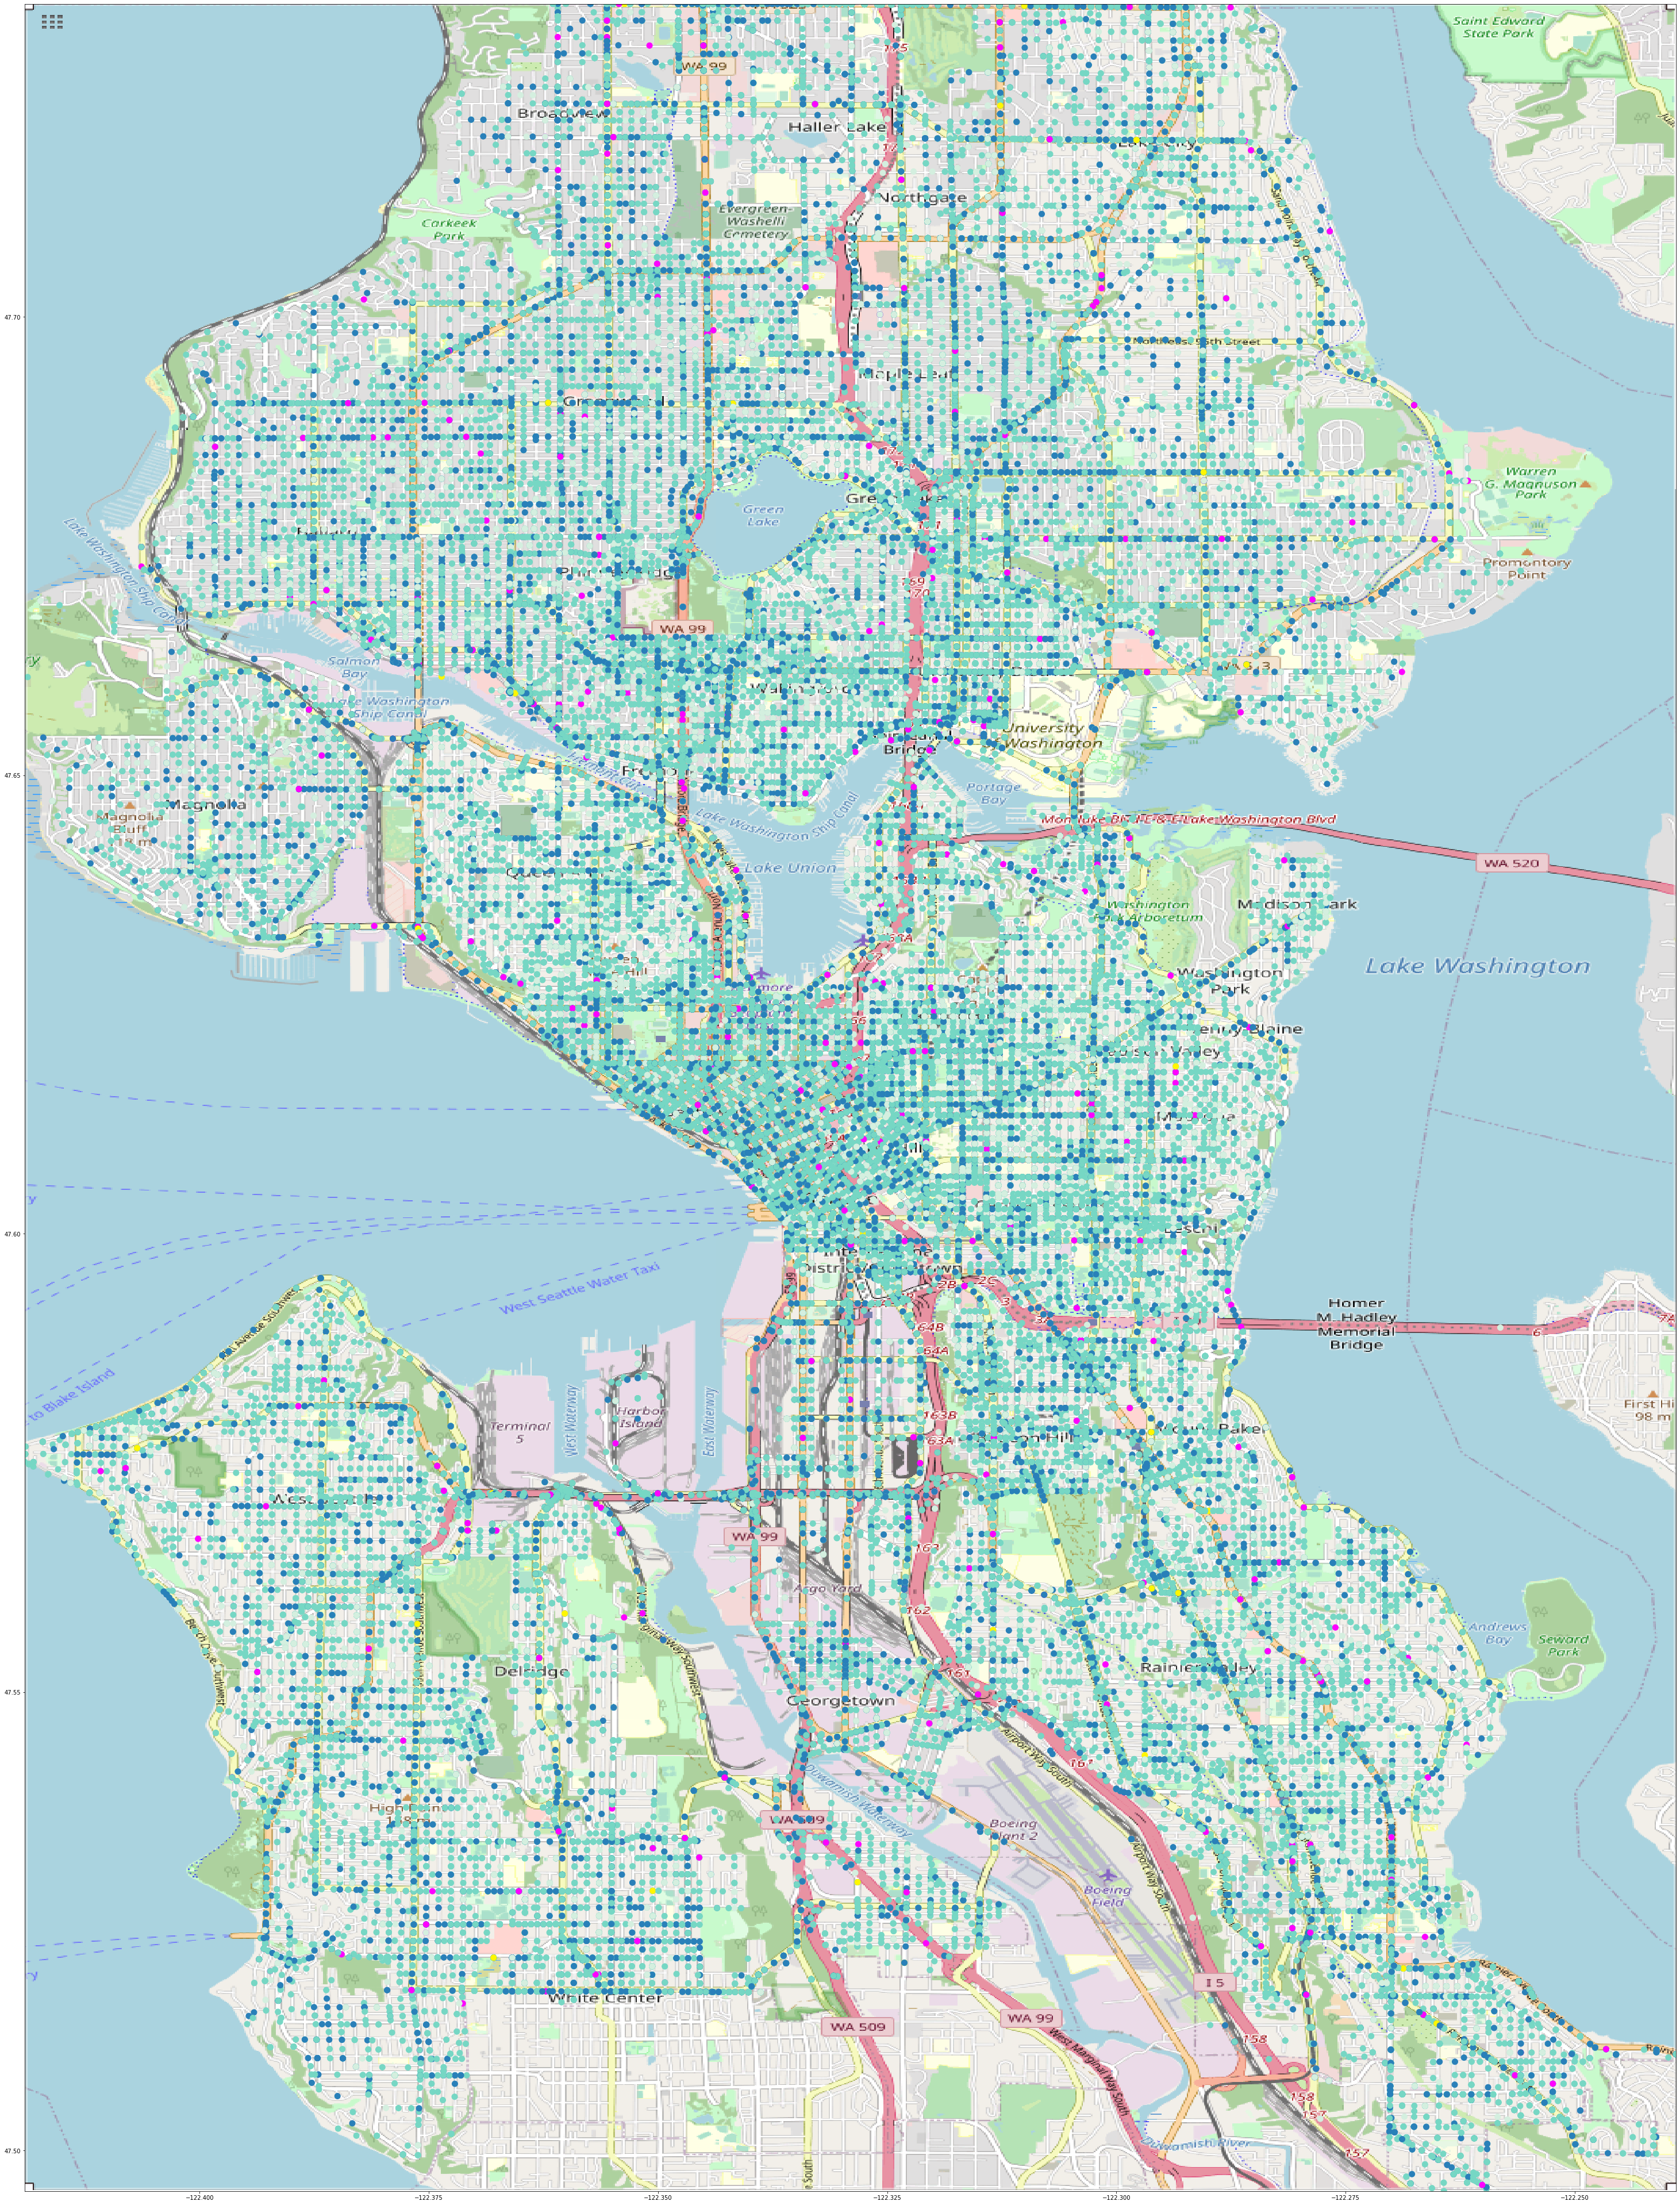

In [43]:
fig, ax = plt.subplots(figsize = (137,70))
ax.scatter(df_coord.Longitude, df_coord.Latitude, zorder=1, alpha = 1, c=color_list, s = 100)
ax.imshow(ruh_m, zorder = 0, extent = BBox, aspect = 'equal')

From a visual analysis the center and the north region os Seattle is the one counting the majority of the accidents, more specifically in the city center. Further analysis should be done to understand why is present such concentration of accidents.
Maybe the density of population, stores, business locations..exc

(Double click on the image to see it in Full Resolution)

### Plots <a name="plots"></a>

Another important way to visualize data is by using plots.
Plots can help to understand data and correlations among them with ease.

Prior to test and set-up our dataframe to study which Machine Learning algorithm is the most suitible for our purpose, I will generate some plots about some correlation of accidents severity, the count of the accidents for each severity with the road conditions, light conditions, weather conditions, speeding, being under drug influence or not paying attention. 

#### Under drug influence vs Accident severity <a name="drugvsacc"></a>

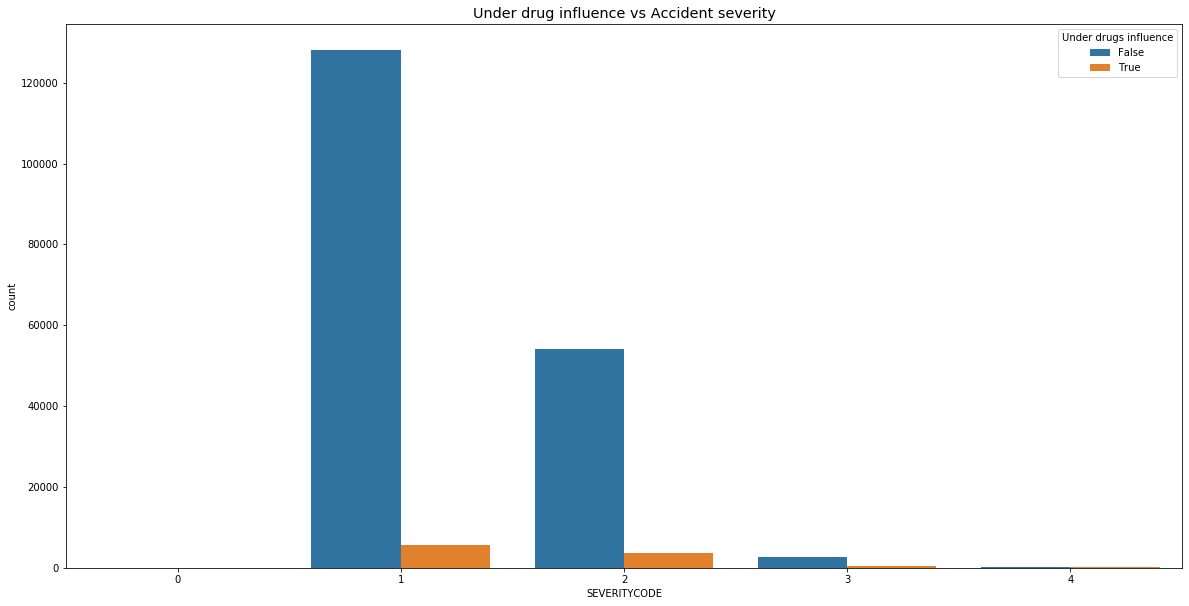

In [44]:
plt.figure(figsize=(20,10))
g = sns.countplot(x="SEVERITYCODE", hue='UNDERINFL', data=df)
plt.title('Under drug influence vs Accident severity', fontsize = 'x-large')
g.legend(['False', 'True'],loc='upper right', title="Under drugs influence" )

In [45]:
df.groupby(['UNDERINFL','SEVERITYCODE']).size().unstack('SEVERITYCODE', fill_value=0)

SEVERITYCODE  0       1      2     3    4
UNDERINFL                                
0             2  128099  54234  2643  246
1             0    5549   3552   409   93

Very interesting to notice the number of cases and gravity, quite high, when the accident occurred with the driver under the use of drugs.

#### Inattention vs Accident Severity <a name="inaacc"></a>

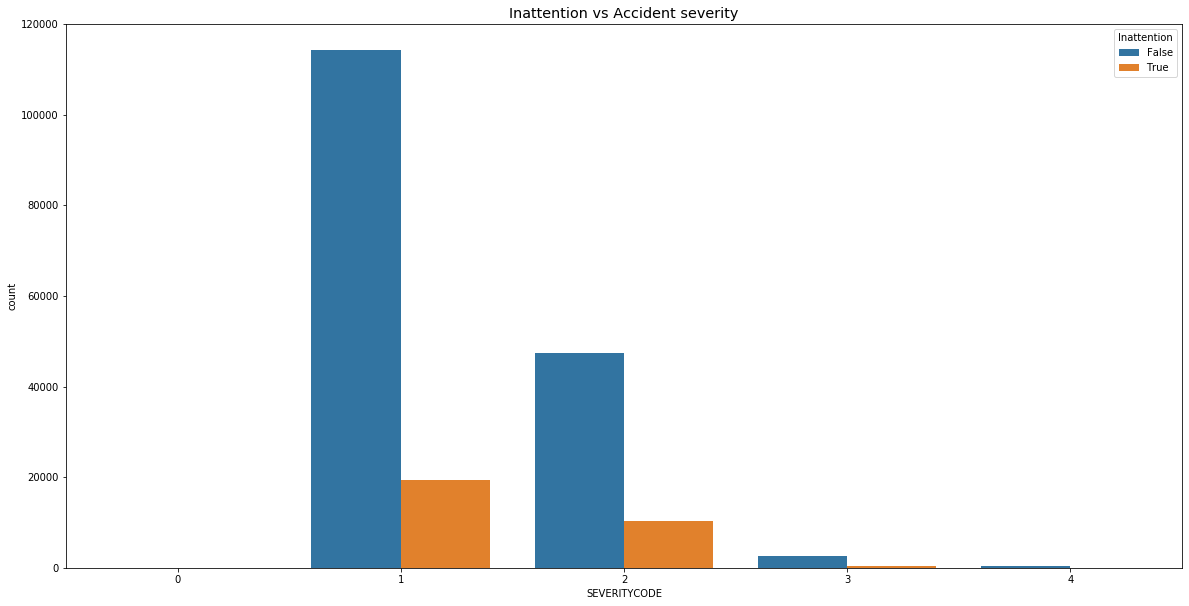

In [46]:
plt.figure(figsize=(20,10))
g = sns.countplot(x="SEVERITYCODE", hue='INATTENTIONIND', data=df)
plt.title('Inattention vs Accident severity', fontsize = 'x-large')
g.legend(['False', 'True'],loc='upper right', title="Inattention" )

In [47]:
df.groupby(['INATTENTIONIND','SEVERITYCODE']).size().unstack('SEVERITYCODE', fill_value=0)

SEVERITYCODE    0       1      2     3    4
INATTENTIONIND                             
0               2  114302  47403  2694  323
1               0   19346  10383   358   16

Inattention plays an important role in the accident severity, not as much as the use of drugs.

#### Speeding vs Accident Severity <a name="speeacc"></a>

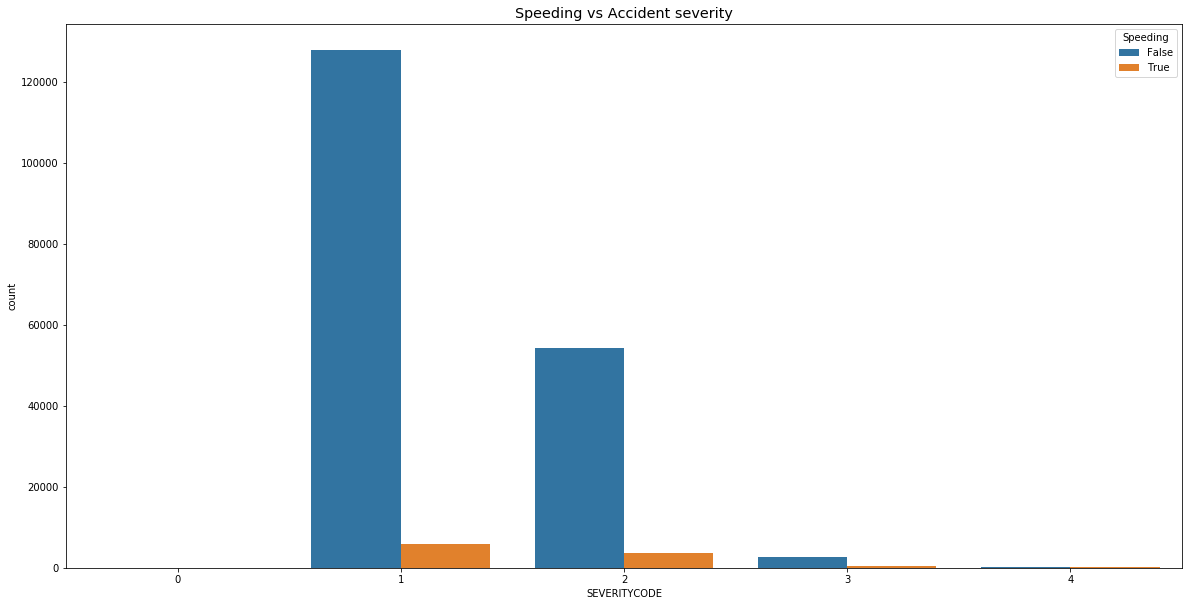

In [48]:
plt.figure(figsize=(20,10))
g = sns.countplot(x="SEVERITYCODE", hue='SPEEDING', data=df)
plt.title('Speeding vs Accident severity', fontsize = 'x-large')
g.legend(['False', 'True'],loc='upper right', title="Speeding" )

In [49]:
df.groupby(['SPEEDING','SEVERITYCODE']).size().unstack('SEVERITYCODE', fill_value=0)

SEVERITYCODE  0       1      2     3    4
SPEEDING                                 
0             1  127767  54215  2676  249
1             1    5881   3571   376   90

Speeding is another variable having an impact on the overall accidents' severity, being really similar to the results obtained from the accidents occurred when under drugs influence.

Let's proceed plotting the other variables, such as:
* Road condition
* Light condition
* Weather condition

#### Road conditions vs Accident severity <a name="roadvsacc"></a>

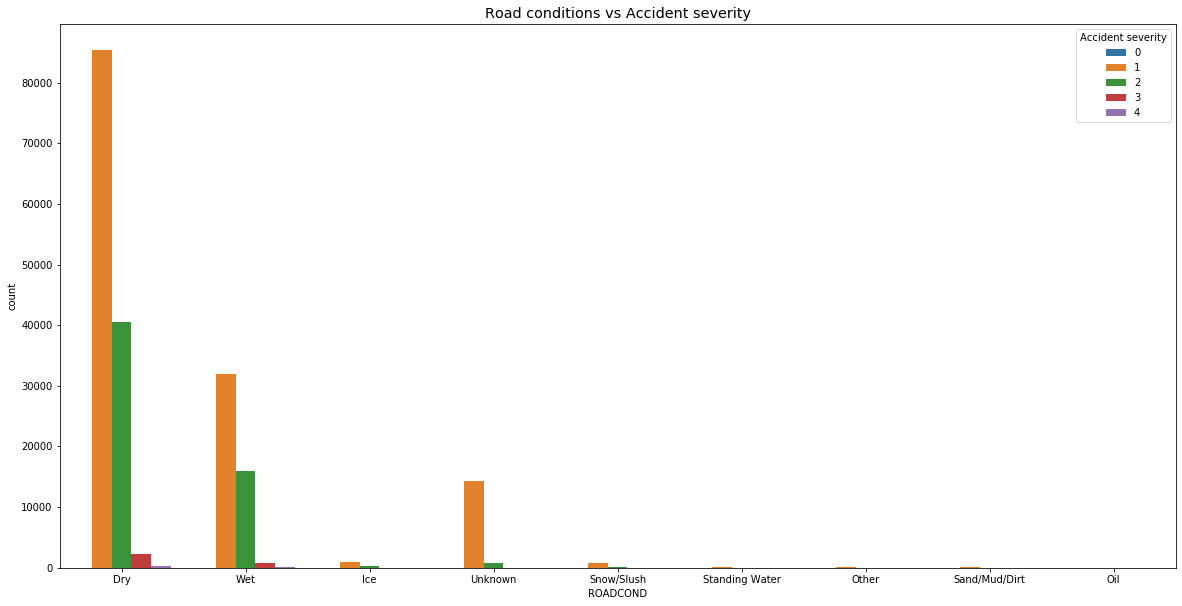

In [50]:
plt.figure(figsize=(20,10))
g = sns.countplot(x="ROADCOND", hue='SEVERITYCODE', data=df)
plt.title('Road conditions vs Accident severity', fontsize = 'x-large')
g.legend(loc='upper right', title="Accident severity" )

In [51]:
df.groupby(['ROADCOND','SEVERITYCODE']).size().unstack('SEVERITYCODE', fill_value=0)

SEVERITYCODE    0      1      2     3    4
ROADCOND                                  
Dry             0  85349  40580  2232  268
Ice             0    935    275    18    1
Oil             0     40     24     0    0
Other           0     89     43     3    0
Sand/Mud/Dirt   0     53     23     0    0
Snow/Slush      0    835    166     8    0
Standing Water  0     86     30     3    0
Unknown         0  14307    753    30    1
Wet             2  31954  15892   758   69

#### Light conditions vs Accident severity <a name="lightvsacc"></a>

Text(0.5, 1.0, 'Light Conditions vs Accident severity')

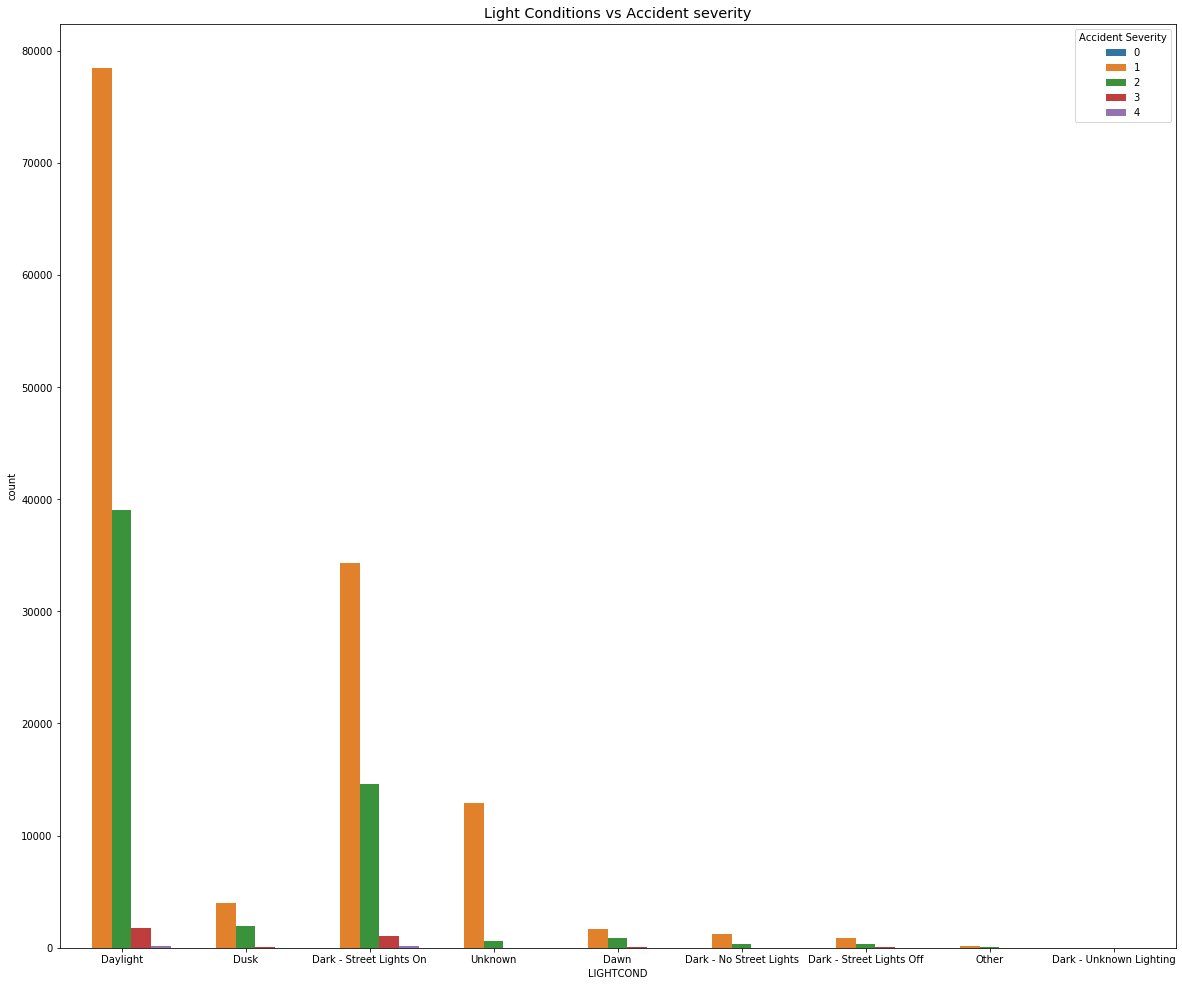

In [52]:
plt.figure(figsize=(20, 17))
g = sns.countplot(x="LIGHTCOND", hue='SEVERITYCODE', data=df)
g.legend(loc='upper right', title="Accident Severity")
plt.title('Light Conditions vs Accident severity', fontsize = 'x-large')

In [53]:
df.groupby(['LIGHTCOND','SEVERITYCODE']).size().unstack('SEVERITYCODE', fill_value=0)

SEVERITYCODE              0      1      2     3    4
LIGHTCOND                                           
Dark - No Street Lights   0   1212    340    25    1
Dark - Street Lights Off  0    883    317    28    4
Dark - Street Lights On   0  34300  14602  1015  146
Dark - Unknown Lighting   0     16      8     0    0
Dawn                      0   1706    837    60    5
Daylight                  2  78475  39061  1785  168
Dusk                      0   3990   1958   110   14
Other                     0    185     54     4    0
Unknown                   0  12881    609    25    1

Differently from what we could think, the majority of the accidents occurred with the Daylight,  but its important to notice teh gravity of teh ones occurred in Dark - Street Light On condition, being almost the same number for severity = 4 as the Daylight ones. The proportion is 1/383 for accidents occurred in Dark and with Street Light on against 1/808 of the accidents occurred in Dailight conditions.

#### Weather conditions vs Accident severity <a name="weathervsacc"></a>

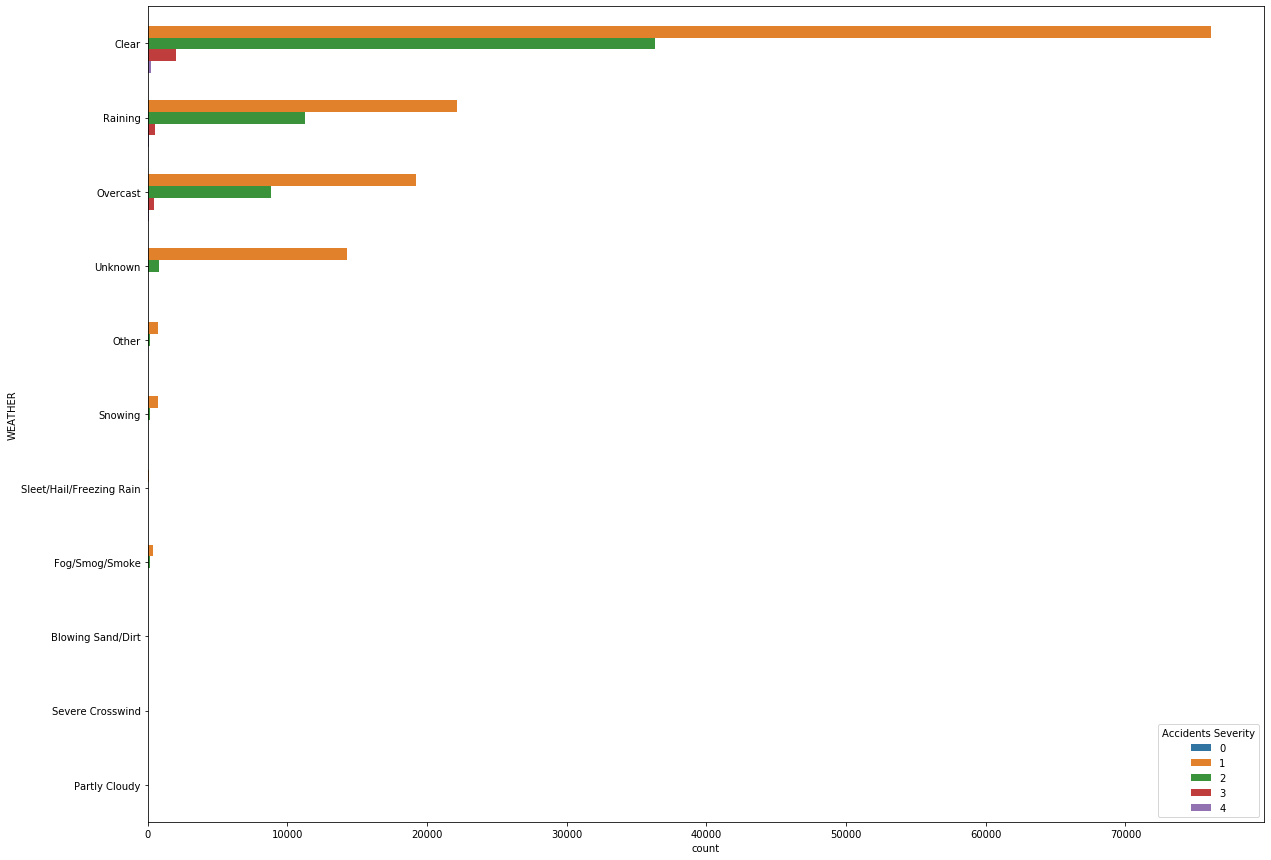

In [54]:
plt.figure(figsize=(20,15))
g = sns.countplot(y="WEATHER", hue='SEVERITYCODE', data=df)
g.legend(loc='lower right', title="Accidents Severity")

In [55]:
df.groupby(['WEATHER','SEVERITYCODE']).size().unstack('SEVERITYCODE', fill_value=0)

SEVERITYCODE              0      1      2     3    4
WEATHER                                             
Blowing Sand/Dirt         0     40     15     0    0
Clear                     1  76108  36317  2016  227
Fog/Smog/Smoke            0    383    188     3    3
Other                     0    722    120     7    3
Overcast                  0  19175   8847   446   53
Partly Cloudy             0      5      4     0    1
Raining                   1  22151  11278   529   50
Severe Crosswind          0     18      7     0    1
Sleet/Hail/Freezing Rain  0     85     29     2    0
Snowing                   0    734    169    10    0
Unknown                   0  14227    812    39    1

Also here the majority the accidents occurred with a Clear weather condition, but other 2 have to be taken into consideration: Overcast and Raining, having almost the same numbers of accidents, slightly higher for the Raining conditions.

#### Weather conditions vs Light conditions using Accident severity as colour parameter <a name="roadvslight"></a>

It is quite understandable that the majority of the accidents occurred mainly with both dry and wet conditions.

<Figure size 5760x720 with 0 Axes>

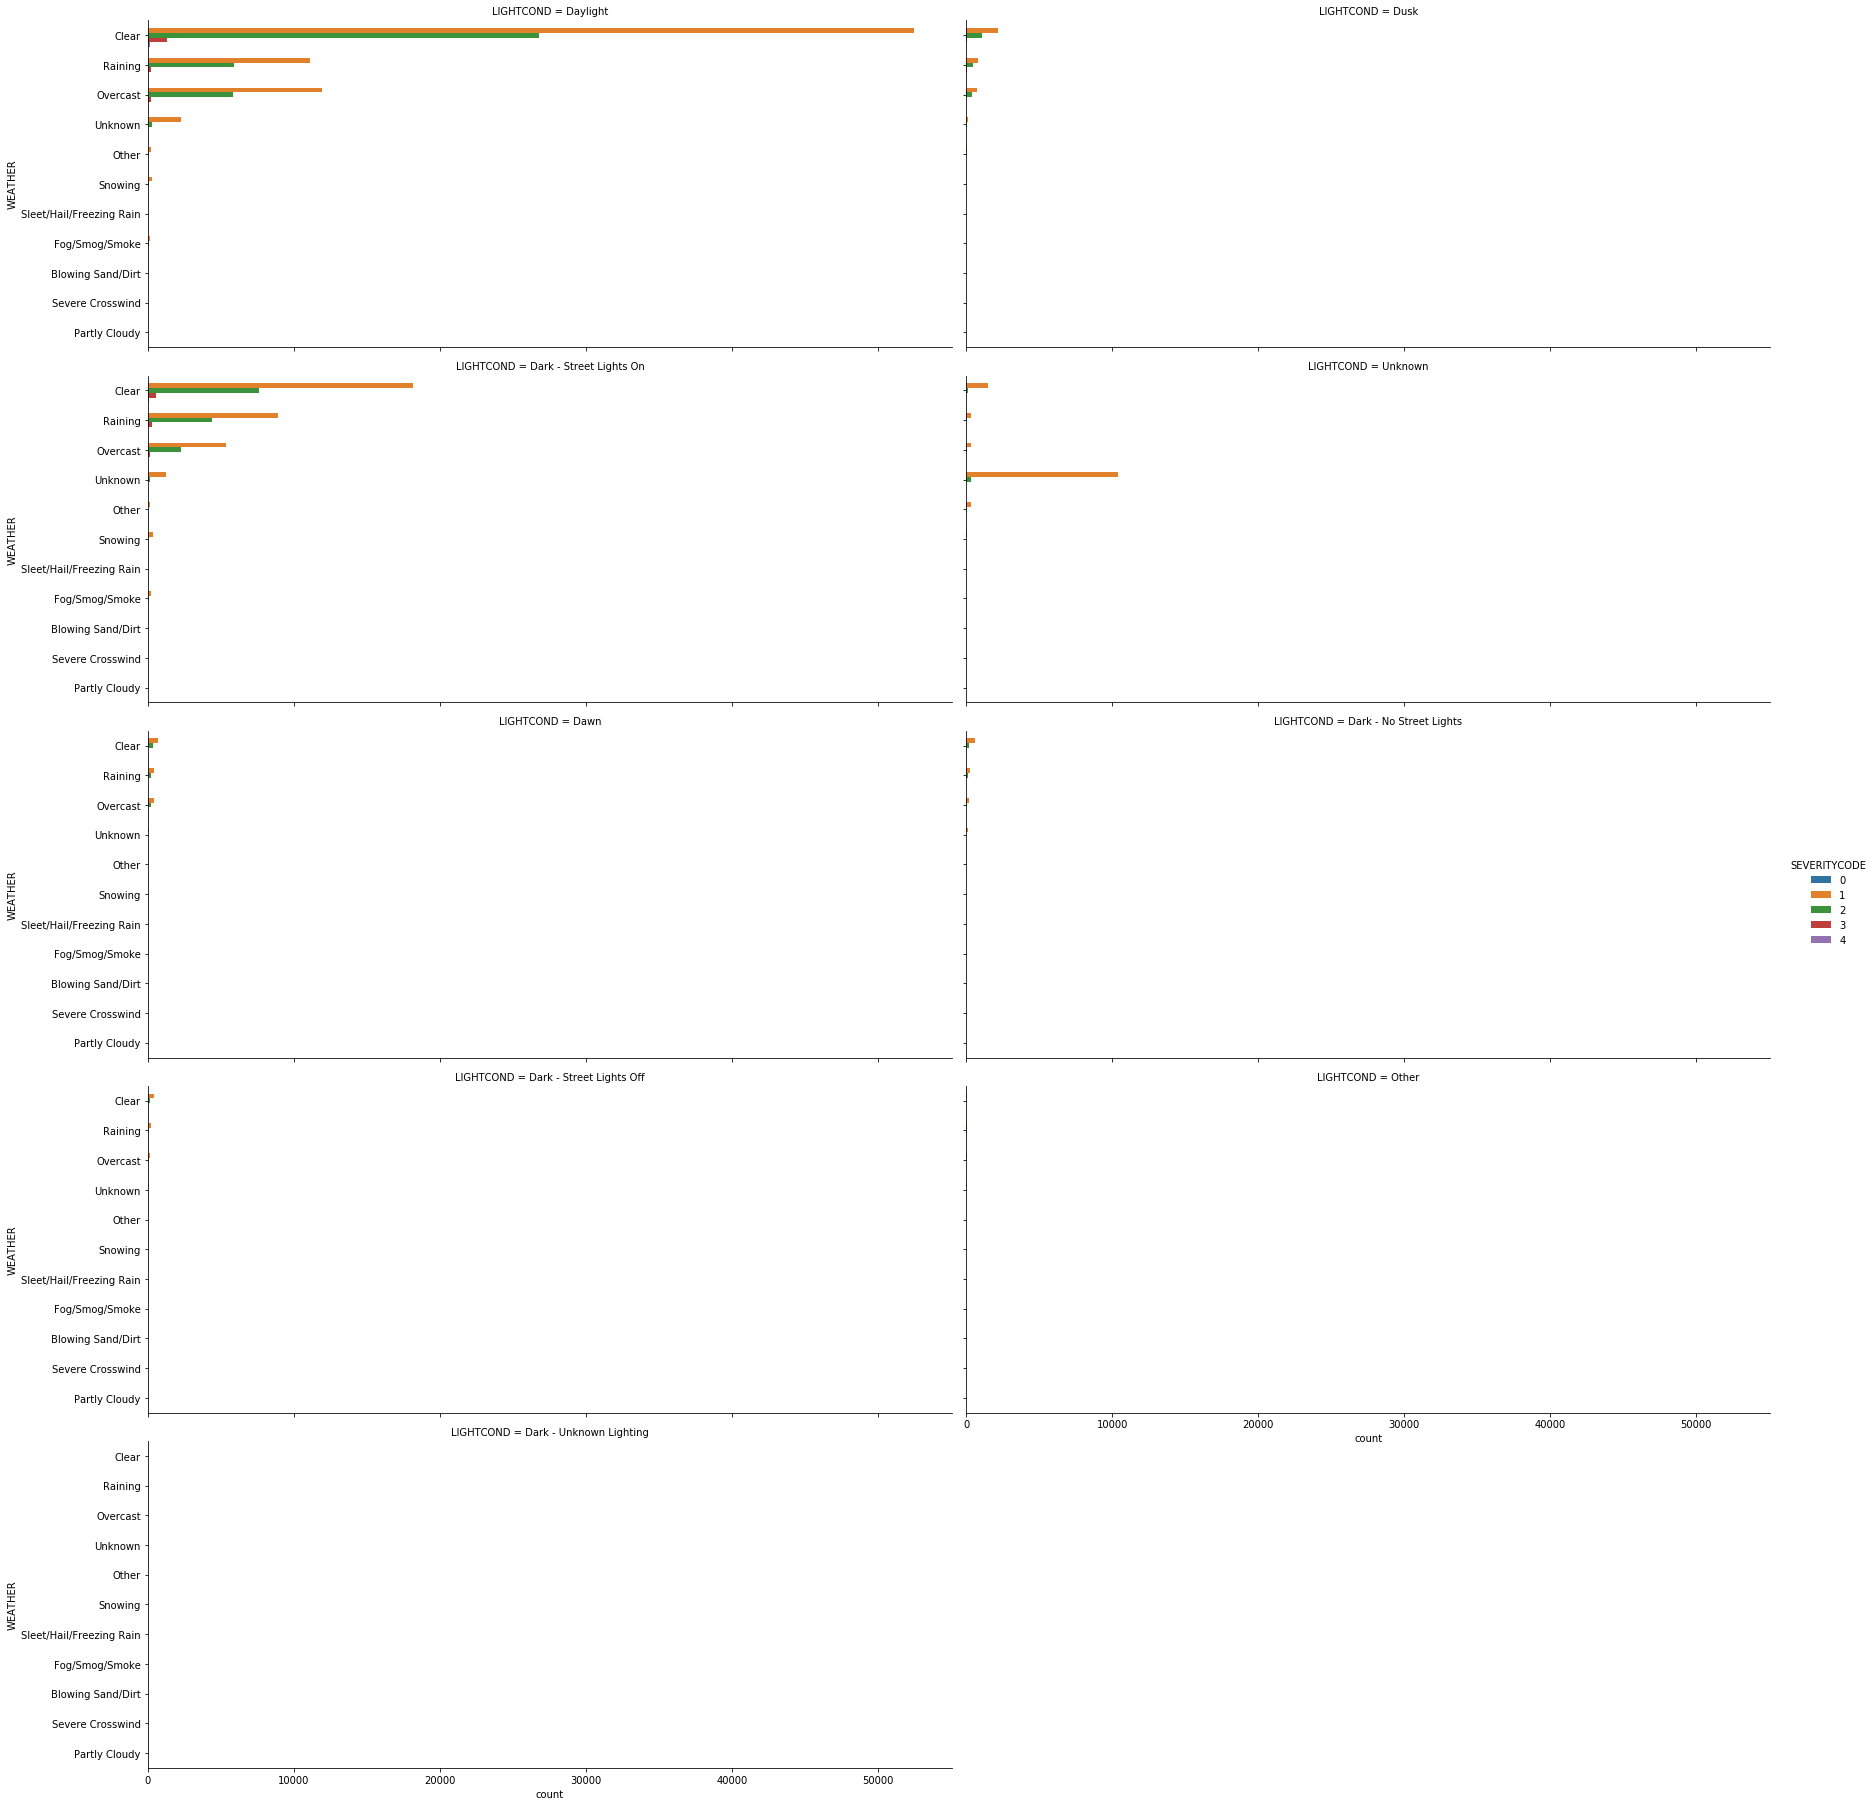

In [56]:
plt.figure(figsize=(80, 10))
g = sns.catplot(y="WEATHER", col = "LIGHTCOND", hue="SEVERITYCODE", data=df, kind="count", aspect=2.5, col_wrap = 2)

#### Road conditions vs Weather conditions using Accident severity as colour parameter<a name="roadvsweather"></a>

<Figure size 5760x720 with 0 Axes>

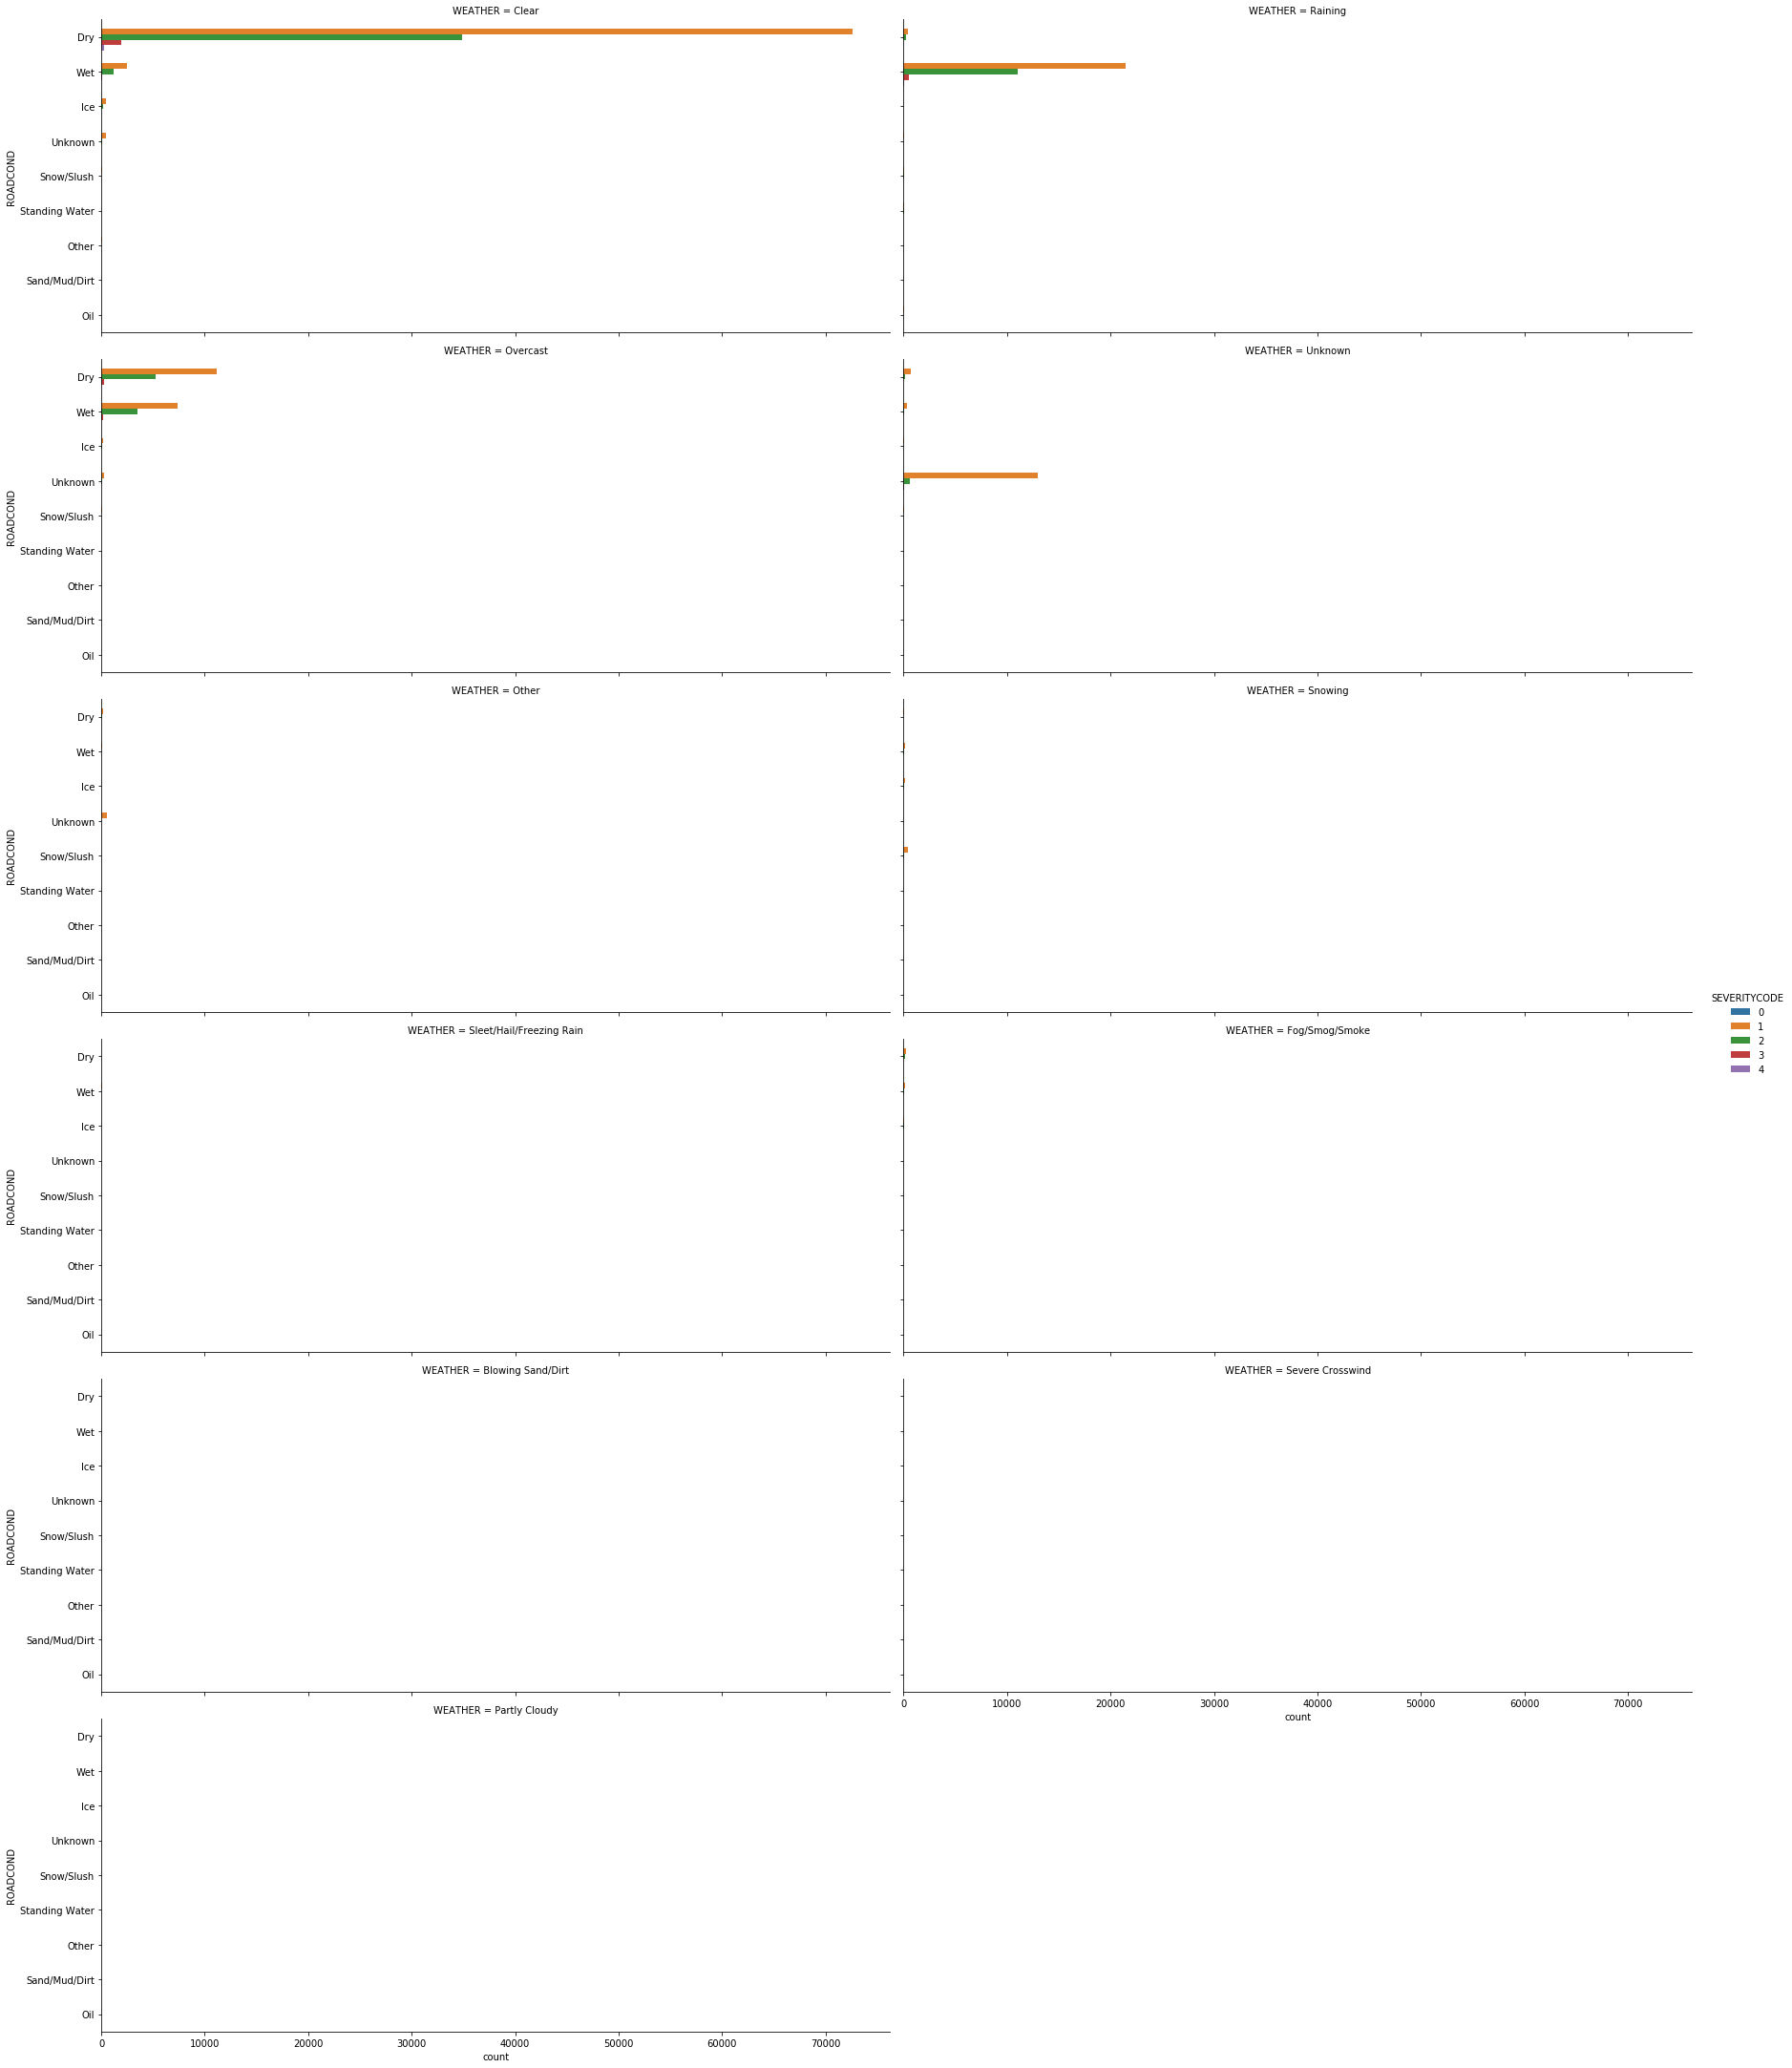

In [57]:
plt.figure(figsize=(80, 10))
g = sns.catplot(y="ROADCOND", col = "WEATHER", hue="SEVERITYCODE", data=df, kind="count", aspect=2.5, col_wrap = 2)

#### Numerical comparison results among Weather conditions, Light conditions and Road conditions, with the count of each Accident severity <a name="variabres"></a> 

In [58]:
df.groupby(['WEATHER','LIGHTCOND','SEVERITYCODE', 'ROADCOND']).size().unstack('SEVERITYCODE', fill_value=0)

SEVERITYCODE                                                      0      1  \
WEATHER                  LIGHTCOND                ROADCOND                   
Blowing Sand/Dirt        Dark - No Street Lights  Dry             0      1   
                         Dark - Street Lights On  Dry             0      4   
                                                  Ice             0      1   
                                                  Snow/Slush      0      2   
                                                  Wet             0      0   
                         Dawn                     Dry             0      0   
                                                  Other           0      0   
                         Daylight                 Dry             0     15   
                                                  Ice             0      3   
                                                  Snow/Slush      0      1   
                                                  Wet             0      3   
                         Dusk                     Dry             0      2   
                         Unknown                  Dry             0      1   
                                                  Ice             0      3   
                                                  Snow/Slush      0      1   
                                                  Unknown         0      2   
                                                  Wet             0      1   
Clear                    Dark - No Street Lights  Dry             0    578   
                                                  Ice             0      9   
                                                  Oil             0      1   
                                                  Other           0      1   
                                                  Sand/Mud/Dirt   0      2   
                                                  Snow/Slush      0      1   
                                                  Unknown         0      6   
                                                  Wet             0     33   
                         Dark - Street Lights Off Dry             0    404   
                                                  Ice             0      5   
                                                  Other           0      1   
                                                  Snow/Slush      0      2   
                                                  Unknown         0      1   
                                                  Wet             0     26   
                         Dark - Street Lights On  Dry             0  16926   
                                                  Ice             0    182   
                                                  Oil             0      2   
                                                  Other           0      7   
                                                  Sand/Mud/Dirt   0      4   
                                                  Snow/Slush      0     29   
                                                  Standing Water  0      2   
                                                  Unknown         0     72   
                                                  Wet             0    905   
                         Dark - Unknown Lighting  Dry             0      7   
                                                  Wet             0      0   
                         Dawn                     Dry             0    614   
                                                  Ice             0     22   
                                                  Other           0      1   
                                                  Sand/Mud/Dirt   0      2   
                                                  Standing Water  0      1   
                                                  Unknown         0      7   
                                                  Wet             0     44   
                      

### Accident severity prediction <a name="severitypred"></a>

#### Transforming categorical columns into numerical columns <a name="getdummies"></a>

To manage categorical data and use them to train our model we need to transform these data into numerical data and the method .get_dummies is the one that will get the job done. 

I create a copy of the "df" dataframe called "df_dummies" to perform the algorithm selection.

In [59]:
df_2 = df.copy()
df_2_dum = pd.get_dummies(df_2)

In [60]:
df_dummies = pd.get_dummies(df)

In [61]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194827 entries, 0 to 221737
Data columns (total 41 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   SEVERITYCODE                        194827 non-null  int64
 1   PERSONCOUNT                         194827 non-null  int64
 2   PEDCOUNT                            194827 non-null  int64
 3   PEDCYLCOUNT                         194827 non-null  int64
 4   VEHCOUNT                            194827 non-null  int64
 5   INJURIES                            194827 non-null  int64
 6   SERIOUSINJURIES                     194827 non-null  int64
 7   FATALITIES                          194827 non-null  int64
 8   INATTENTIONIND                      194827 non-null  int32
 9   UNDERINFL                           194827 non-null  int32
 10  PEDROWNOTGRNT                       194827 non-null  int32
 11  SPEEDING                            194827 non-null 

In [62]:
df_dummies.head()

SEVERITYCODE  PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  INJURIES  \
0             1            2         0            0         2         0   
1             1            2         0            0         2         0   
2             2            2         0            0         2         1   
3             2            3         1            0         1         1   
4             2            2         0            0         1         1   

   SERIOUSINJURIES  FATALITIES  INATTENTIONIND  UNDERINFL  PEDROWNOTGRNT  \
0                0           0               0          0              0   
1                0           0               1          0              0   
2                0           0               0          0              0   
3                0           0               0          0              0   
4                0           0               0          0              0   

   SPEEDING  WEATHER_Blowing Sand/Dirt  WEATHER_Clear  WEATHER_Fog/Smog/Smoke  \
0         0                          0              1                       0   
1         0                          0              0                       0   
2         0                          0              1                       0   
3         0                          0              0                       0   
4         1                          0              1                       0   

   WEATHER_Other  WEATHER_Overcast  WEATHER_Partly Cloudy  WEATHER_Raining  \
0              0                 0                      0                0   
1              0                 0                      0                1   
2              0                 0                      0                0   
3              0                 0                      0                1   
4              0                 0                      0                0   

   WEATHER_Severe Crosswind  WEATHER_Sleet/Hail/Freezing Rain  \
0                         0                                 0   
1                         0                                 0   
2                         0                                 0   
3                         0                                 0   
4                         0                                 0   

   WEATHER_Snowing  WEATHER_Unknown  ROADCOND_Dry  ROADCOND_Ice  ROADCOND_Oil  \
0                0                0             1             0             0   
1                0                0             0             0             0   
2                0                0             1             0             0   
3                0                0             0             0             0   
4                0                0             0             1             0   

   ROADCOND_Other  ROADCOND_Sand/Mud/Dirt  ROADCOND_Snow/Slush  \
0               0                       0                    0   
1               0                       0                    0   
2               0                       0                    0   
3               0                       0                    0   
4               0                       0                    0   

   ROADCOND_Standing Water  ROADCOND_Unknown  ROADCOND_Wet  \
0                        0                 0             0   
1                        0                 0             1   
2                        0                 0             0   
3                        0                 0             1   
4                        0                 0             0   

   LIGHTCOND_Dark - No Street Lights  LIGHTCOND_Dark - Street Lights Off  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   LIGHTCOND_Dark - Street Lights 

### Choice of the best machine learning algorithm <a name="choicealgo"></a>

The algorithms I thought to be the most suitable for this problem are: Random Forest and Decision Trees.
But only one has to be used and it will be the one having the best overall accuracy.

### Accident severity prediction using all the valuable features

#### Random Forest Algorithm <a name="randomforest"></a>

First of all, I will transform my data into an array of data.

label: is my target value, the one that I need to predict.
features: are the columns that I will use to predict the label.

The algorithms I choose are Random Forest and Decision Trees. Decision Trees because it is really fast and Random Forest because as the name says, is made of a number of Decision Trees ( n_estimators ).

In [63]:
label = np.array(df_dummies['SEVERITYCODE'])
features = df_dummies.drop('SEVERITYCODE', axis= 1)
features_names = list(features.columns)
features = np.array(features)

I split the data into training and test, with 30% of Test data and 70% of Training data.

In [64]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=1, stratify=label)

I'm going to use a Random Forest Classifier instead of a Random Forest Regressor, since I need to predict fixed label values.

In [65]:
rfc=RandomForestClassifier(n_estimators=7, n_jobs= -1)
rfc.fit(features_train,label_train)
predicted_label=rfc.predict(features_test)
rf_accuracy=accuracy_score(label_test, predicted_label)

print("The Randon Forest algorithm has an accuracy of: {:.10f}.".format(rf_accuracy))

The Randon Forest algorithm has an accuracy of: 0.9999828911.


#### Random Forest Features Importance <a name="randfeat"></a>

In [66]:
feature_imp_rfc = pd.Series(rfc.feature_importances_,index=features_names).sort_values(ascending=False)

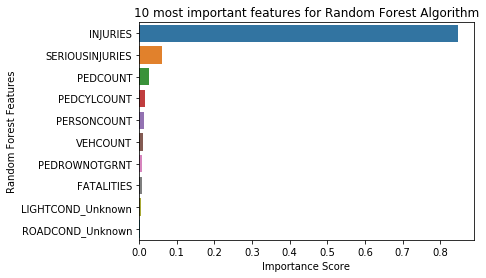

In [67]:
col=10
sns.barplot(x=feature_imp_rfc[:10], y=feature_imp_rfc.index[:col])
plt.xlabel('Importance Score')
plt.ylabel('Random Forest Features')
plt.title("10 most important features for Random Forest Algorithm")
plt.show()

#### Decision Trees Algorithm <a name="decision"></a>

In [68]:
dectree = DecisionTreeClassifier(max_depth=7, criterion='gini', random_state=1)

In [69]:
dectree.fit(features_train, label_train)
pred_tree = dectree.predict(features_test)
tree_accuracy=accuracy_score(label_test, pred_tree)
print('The Decision Tree algorithm has an accuracy of: {:.10f}'.format(tree_accuracy))

The Decision Tree algorithm has an accuracy of: 1.0000000000


Since Decision Tree algorithm is sensitive to overfitting, I will also perform cross_validation, checking for the best max_depth parameter to obtain the best cross validation accuracy and the best model accuracy.

In [70]:
from sklearn.model_selection import cross_val_score
depth=[]
for i in range(1,5):     
    dectree_i = DecisionTreeClassifier(max_depth=i, criterion='gini', random_state=1)
    scores = cross_val_score(estimator=dectree_i, X = features, y = label, cv= 2, n_jobs = -1)
    depth.append((i,scores.mean()))
print(depth)

[(1, 0.9825845493953269), (2, 0.9993532727065026), (3, 0.9999435394160198), (4, 0.9999435394160198)]


As visible from the results, after e certain max_depth value the cross validation score gives the same result, maxing it at ~1.0. 

#### Decision Tree Features Importance <a name="decfeat"></a>

In [71]:
feature_imp_dec = pd.Series(dectree.feature_importances_,index=features_names).sort_values(ascending=False)

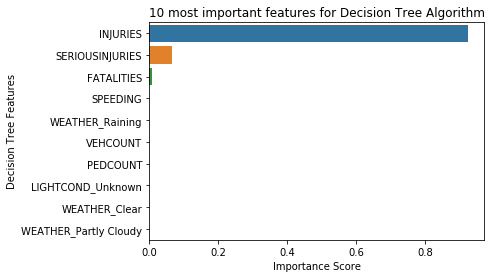

In [72]:
col=10
sns.barplot(x=feature_imp_dec[:10], y=feature_imp_dec.index[:col])
plt.xlabel('Importance Score')
plt.ylabel('Decision Tree Features')
plt.title("10 most important features for Decision Tree Algorithm")
plt.show()

### Accident severity prediction using only the weather conditions, light conditions and road conditions <a name="predwlr"></a>

I drop all the columns I don't need for this study

In [73]:
label = np.array(df_2_dum['SEVERITYCODE'])
features = df_2_dum.drop(['SEVERITYCODE','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SPEEDING','PERSONCOUNT'], axis= 1)
features_names = list(features.columns)
features = np.array(features)

In [74]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.3, random_state=1, stratify=label)

#### Random Forest Algorithm 2 <a name="ranwlr"></a>

In [75]:
rfc=RandomForestClassifier(n_estimators=10, n_jobs= -1)
rfc.fit(features_train,label_train)
predicted_label=rfc.predict(features_test)
rf_accuracy=accuracy_score(label_test, predicted_label)

print("The Randon Forest algorithm has an accuracy of: {:.10f}.".format(rf_accuracy))

The Randon Forest algorithm has an accuracy of: 0.6856062550.


#### Random Forest feature importance 2 <a name="rfwlr"></a>

In [76]:
feature_imp_rfc = pd.Series(rfc.feature_importances_,index=features_names).sort_values(ascending=False)

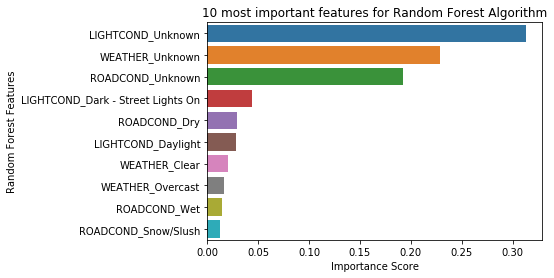

In [77]:
col=10
sns.barplot(x=feature_imp_rfc[:10], y=feature_imp_rfc.index[:col])
plt.xlabel('Importance Score')
plt.ylabel('Random Forest Features')
plt.title("10 most important features for Random Forest Algorithm")
plt.show()

#### Decision Tree Algorithm 2<a name="decwlr"></a>

In [78]:
dectree = DecisionTreeClassifier(max_depth=11, criterion='gini', random_state=1)

In [79]:
dectree.fit(features_train, label_train)
pred_tree = dectree.predict(features_test)
tree_accuracy=accuracy_score(label_test, pred_tree)
print('The Decision Tree algorithm has an accuracy of: {:.10f}'.format(tree_accuracy))

The Decision Tree algorithm has an accuracy of: 0.6858457801


#### Decision Tree feature importance 2 <a name="dcfwlr"></a>

In [80]:
feature_imp_dec = pd.Series(dectree.feature_importances_,index=features_names).sort_values(ascending=False)

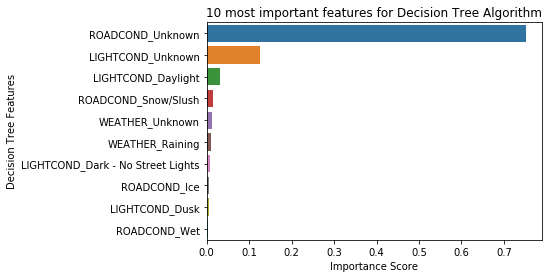

In [81]:
col=10
sns.barplot(x=feature_imp_dec[:10], y=feature_imp_dec.index[:col])
plt.xlabel('Importance Score')
plt.ylabel('Decision Tree Features')
plt.title("10 most important features for Decision Tree Algorithm")
plt.show()

## Results and Discussion <a name="results"></a>

The algorithm that was the most suitable for this problem, in terms of accuracy and computing speed, was the Decision Tree Algorithm. The accuracy was slightly higher in comparison with the Random Forest Algorithm, even if this last one was considering more variables to predict the output.

<b>Using all the valuable columns</b>, the most important datum for both the algorithms was the <b>Injuries</b> one, allowing the algorithms to reach 100% of accuracy. 
The <b>Random Forest algorithm</b> scored an accuracy of 0.9998631285, while the <b>Decision Tree algorithm</b> scored an accuracy of 1.0000000000.

<b>Considering only the weather, light and road conditions</b>, the best accuracy was reached againd by the <b>Decision Tree algorithm</b>, scoring an accuracy of 0.6858457801 .
    
The total decrement in terms of accuracy can be explained by the lack of informations. Data are not enough to produce a better model given only those three variables. Other objective variables are needed.
Anyway the algorithm perform well, being quite accurate.

## Conclusion <a name="conclusion"></a>

It was really interesting to develop a machine learning model to predict the accident severity given a dataset. 

Accidents severity and accidents themself happen everyday, and almost everywhere. 

Given the two analysis I made I can affirm:<br>
<b>First analysis</b><br>In the first analysis many variables could be discarded, since the model requires less than 4 main variables to achive almost the same accuracy. In terms of "money per computational time", this would lead to the perfect method to obtain at the same time:  money and time saving and great accuracy. The overall accuracy regiestered was of ~0.99% with the same cross validation score. 
The model performed really well.

<b>Second analysis</b><br>I also decided to do another analysis, taking into consideration only 3 variables: weather conditions, light conditions and road conditions. 
Differently from what happened before, the accuracy of the model was drastically decreased, obtaining a value of 0.62% of accuracy. This mean, having these data it isn't sufficiently possible to predict with an high accuracy the severity of an accident. I also had to balance the dataset, since I would have too many data for the most frequent registered datum. For this reason I dropped those rows with NaN values. 

The first model in the first analysis is perfect to predict an accident severity knowing the people involved, the people injured and the number of vehicles involved in the accident.

The second model could predict the accident severity knowing the weather conditions, road conditions and light conditions. 
More data are required to obtain better results, and maybe other objective variables.